In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
from experiment_mnist import *
from tfshow import *

Using TensorFlow backend.


In [2]:
methods = ['l1', 'l2', 'delta', 'dropout', 'none']
activations = ['sigmoid', 'relu']
layers = [1,2,3,4,5,6]
reg_coeff = np.logspace(-3,3,10)

### Sigmoid, 1 layer, 50 neurons, 0.2 dropout, K = 0.1

In [34]:
N = [10, 20, 30]
P = [0.1231, 0.1, 0.5]
#N = [10, 10, 10, 10, 10]
#P = [0.1, 0, 0, 0, 0]
KLips = 5.1123
epochs = 50
activation = 'relu'

  0%|          | 0/50 [00:00<?, ?it/s]

Error is_last = 0 1 = (pC + K(1-p) DeltaOld)wnorm p = 0.123100 C = <tf.Variable 'Variable_29:0' shape=() dtype=float32_ref> K = 5.112300 DeltaOld = 0 wnorm = Tensor("dense_82/weight_regularizer/Max:0", shape=(), dtype=float32)
Error is_last = 0 2 = (pC + K(1-p) DeltaOld)wnorm p = 0.100000 C = <tf.Variable 'Variable_30:0' shape=() dtype=float32_ref> K = 5.112300 DeltaOld = Tensor("dense_82/weight_regularizer/mul_1:0", shape=(), dtype=float32) wnorm = Tensor("dense_83/weight_regularizer/Max:0", shape=(), dtype=float32)
Error is_last = 1 3 = (pC + K(1-p) DeltaOld)wnorm p = 0.500000 C = <tf.Variable 'Variable_31:0' shape=() dtype=float32_ref> K = 5.112300 DeltaOld = Tensor("dense_83/weight_regularizer/mul_2:0", shape=(), dtype=float32) wnorm = Tensor("dense_84/weight_regularizer/Max:0", shape=(), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)          

100%|██████████| 50/50 [00:06<00:00,  9.83it/s]


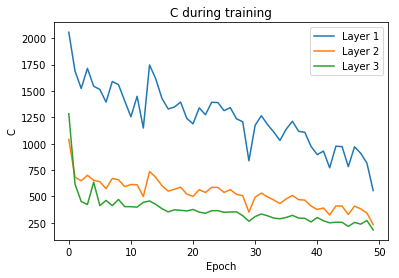

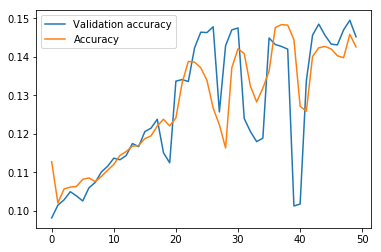

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [35]:
model_no_reg = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = 'delta',
                             reg_coeff = 0, do_print = True)

### Sanity check

In [36]:
self = model_no_reg
model = self.original_model
reg1 = K.function([K.learning_phase()], [self.reg])
reg = lambda : reg1([1])[0]
self.update_C_train(1000)
v1 = reg()
v2 = self.get_mean_std_error()[0]
assert np.allclose(v1, v2), "Bound error"

### Running the model

In [100]:
model_no_reg.run(inputs = 20, repetitions = 10000)

 90%|█████████ | 18/20 [00:02<00:00,  9.04it/s]

KeyboardInterrupt: 

### Calculating accuracy

In [ ]:
acc_no_reg = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm)
print(acc_no_reg)

In [89]:
acc_no_reg_orig = model_no_reg.get_accuracy(1000, 1000, tqdm_ = tqdm, no_dropout = True)
print(acc_no_reg_orig)

'Tensor("dense_60/weight_regularizer/mul_2:0", shape=(), dtype=float32)'

In [12]:
def plot_error(method = 'l1', coeffs = np.logspace(-10, 1, 30)):
    models = {}
    fail_accs = []
    orig_accs = []
    for coeff in coeffs:
        models[coeff] = MNISTExperiment(N, P, KLips, epochs = epochs, activation = activation, reg_type = method,
                                 reg_coeff = coeff, do_print = True)
        fail_accs += [models[coeff].get_accuracy(500, 500)]
        orig_accs += [models[coeff].get_accuracy(500, no_dropout = True)]
        K.clear_session()
    plt.figure()
    plt.title(method + ' and resilience')
    plt.xlabel('Regularization coefficient')
    plt.ylabel('Accuracy')
    plt.plot(coeffs, fail_accs, label = 'Dropout')
    plt.plot(coeffs, orig_accs, label = 'No dropout')
    plt.plot(coeffs, [acc_no_reg] * len(coeffs), label = 'No reg, dropout')
    plt.plot(coeffs, [acc_no_reg_orig] * len(coeffs), label = 'No reg, no dropout')
    plt.xscale('log')
    plt.legend()
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:51<00:00,  7.92it/s]


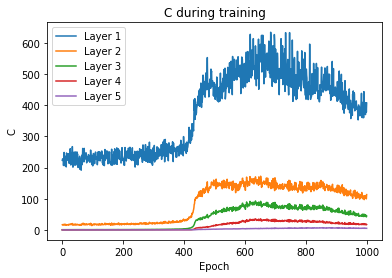

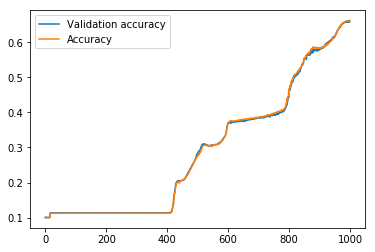

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:59<00:00,  7.85it/s]


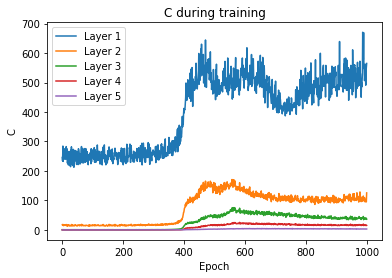

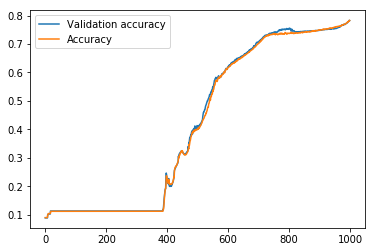

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  7.87it/s]


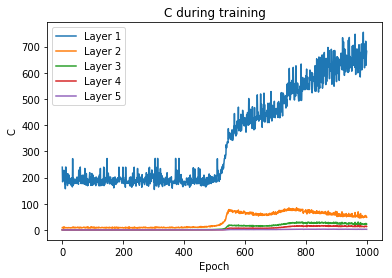

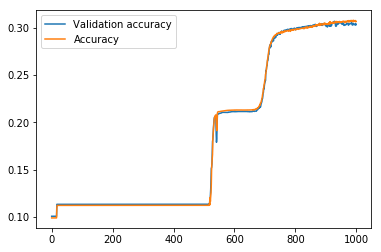

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:51<00:00,  8.28it/s]


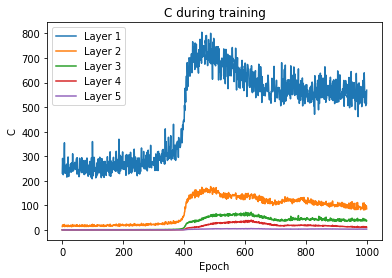

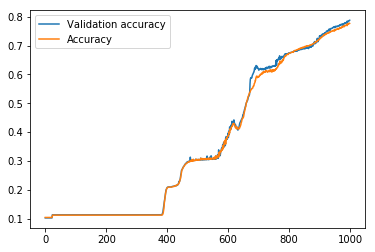

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.49it/s]


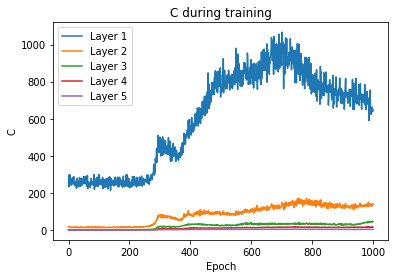

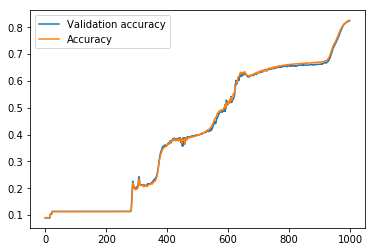

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:55<00:00,  8.19it/s]


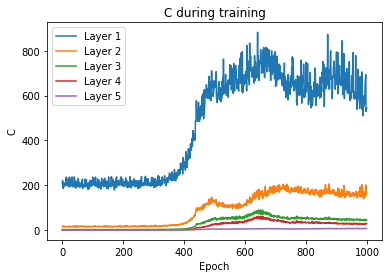

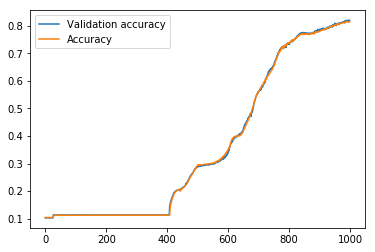

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:58<00:00,  8.35it/s]


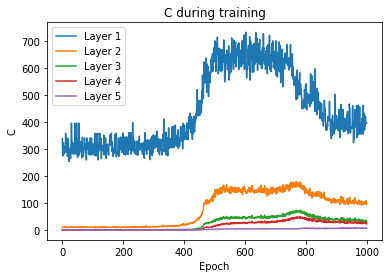

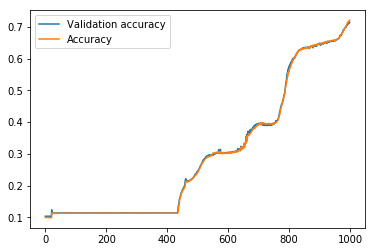

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:52<00:00,  8.95it/s]


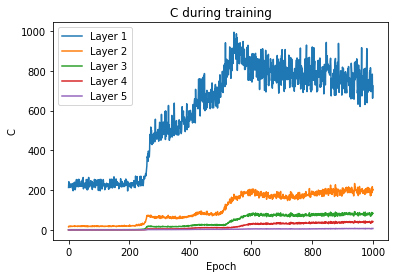

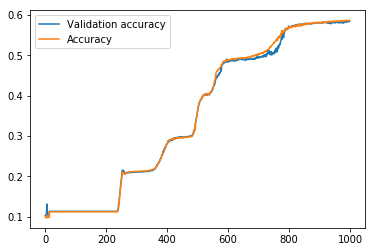

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:50<00:00,  8.43it/s]


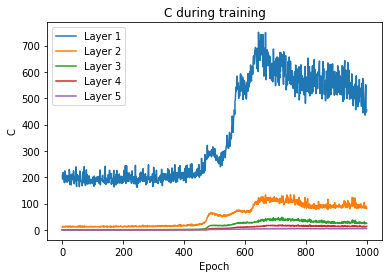

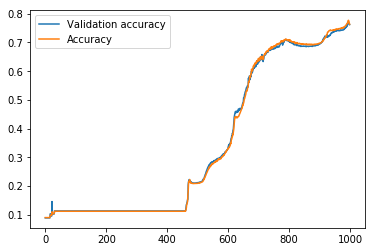

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:49<00:00,  8.54it/s]


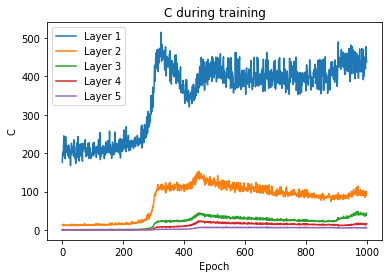

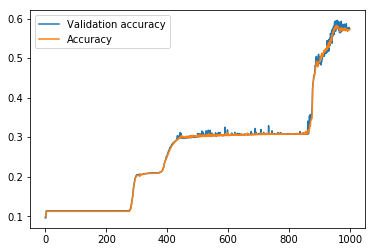

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:47<00:00,  8.50it/s]


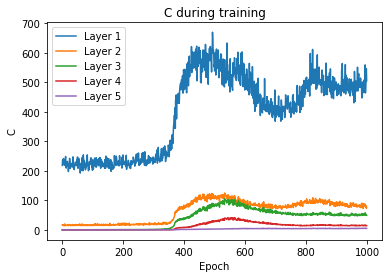

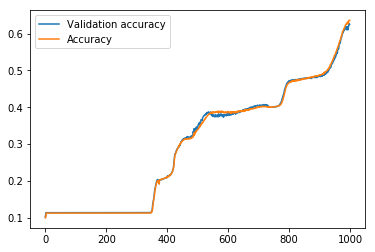

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.58it/s]


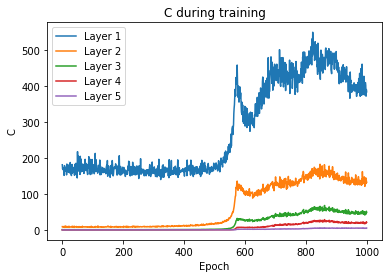

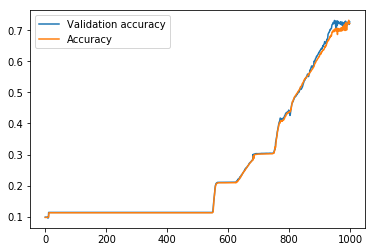

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  7.58it/s]


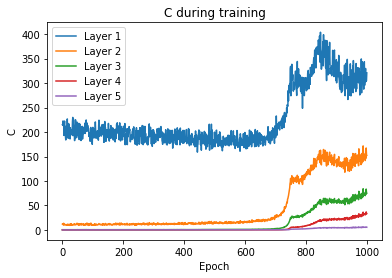

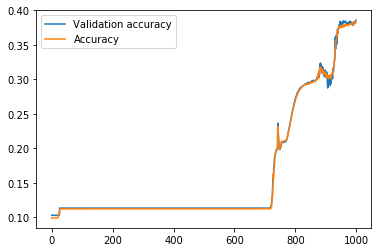

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.62it/s]


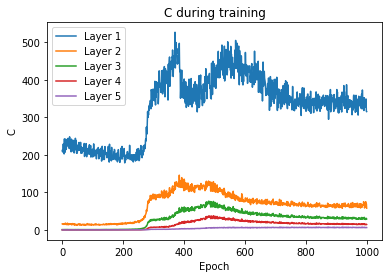

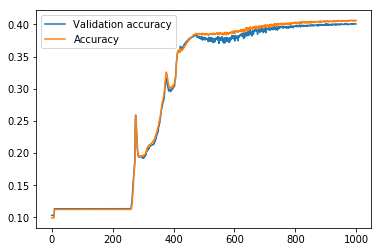

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:44<00:00,  7.87it/s]


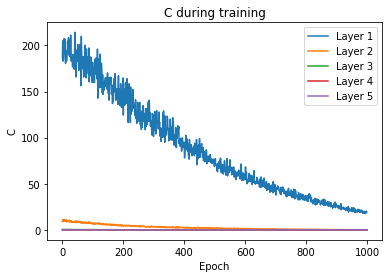

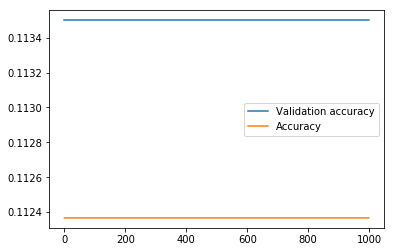

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:49<00:00,  8.07it/s]


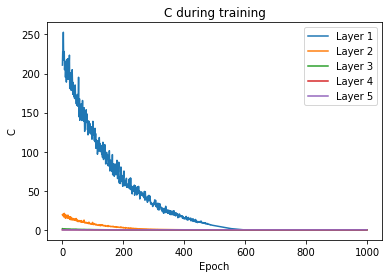

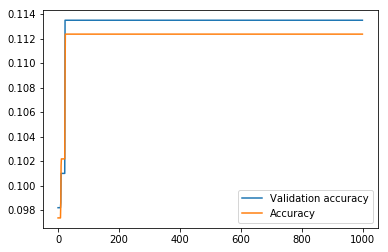

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.43it/s]


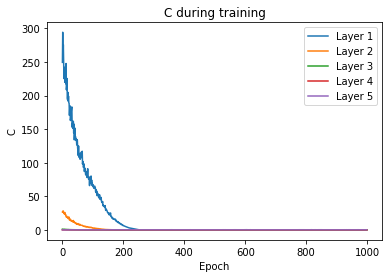

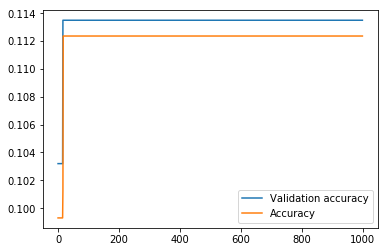

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  8.65it/s]


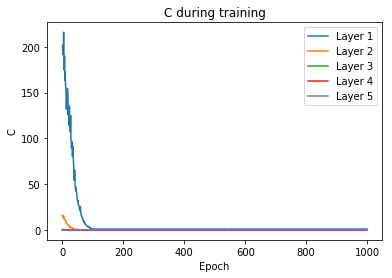

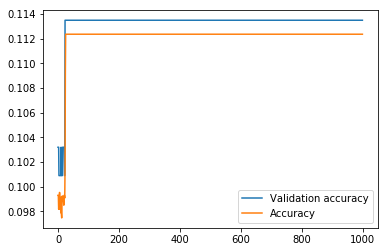

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:52<00:00,  8.27it/s]


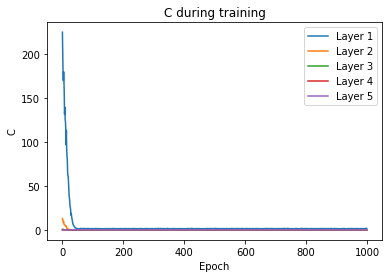

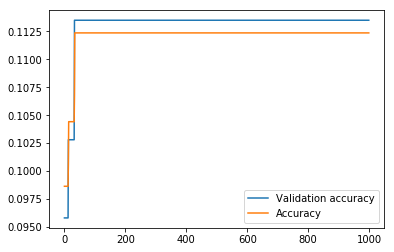

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:47<00:00,  7.82it/s]


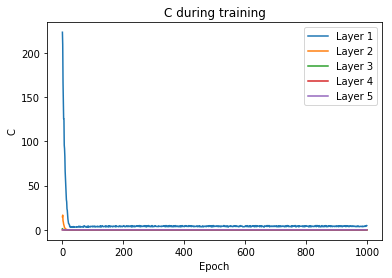

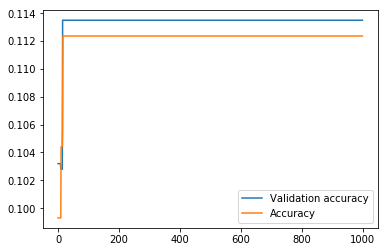

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.48it/s]


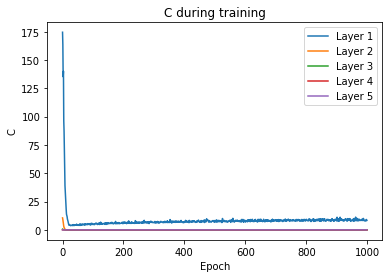

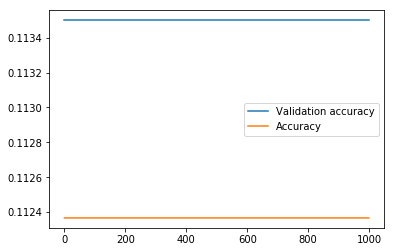

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  7.83it/s]


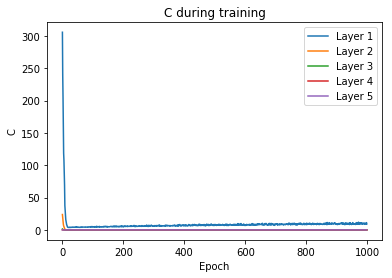

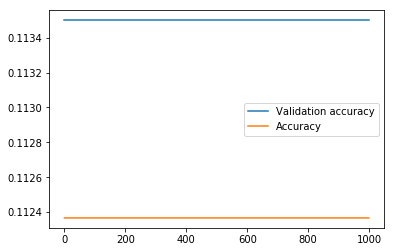

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  8.83it/s]


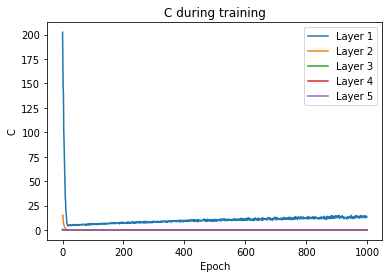

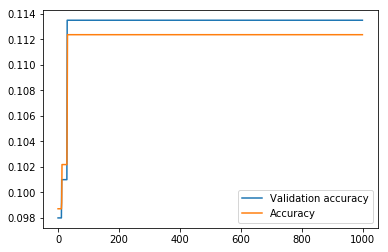

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:52<00:00,  8.84it/s]


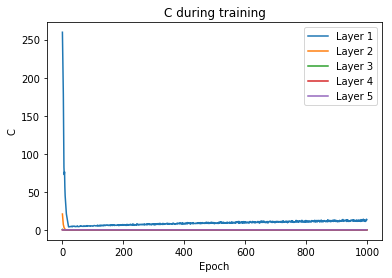

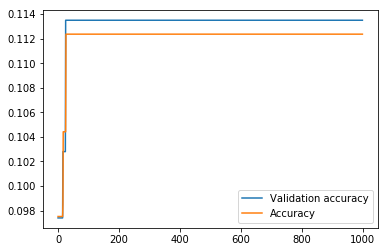

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.47it/s]


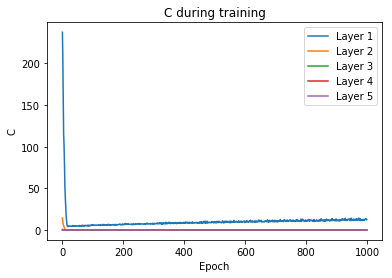

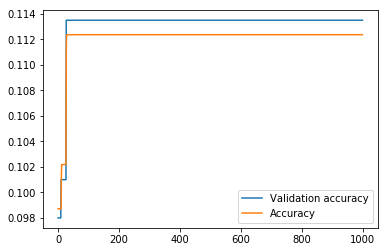

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.59it/s]


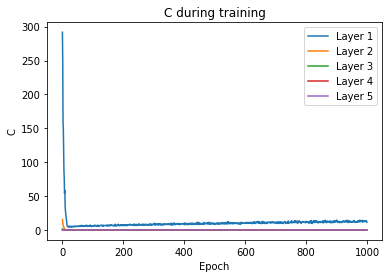

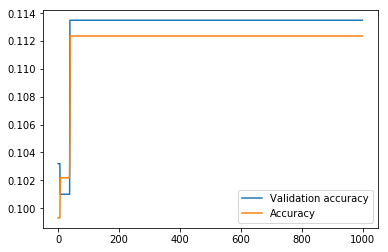

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:44<00:00,  7.73it/s]


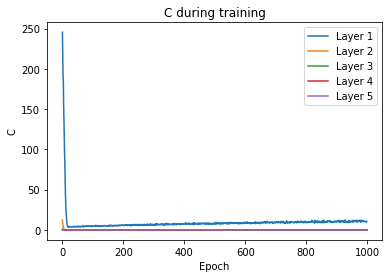

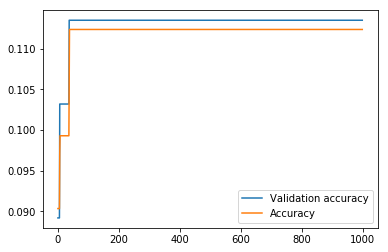

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.54it/s]


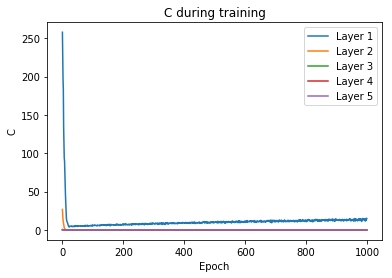

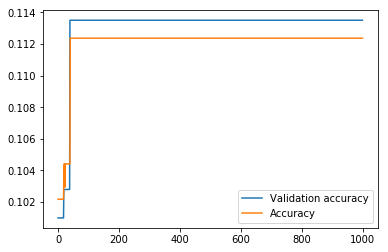

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.45it/s]


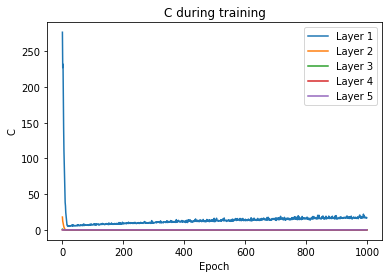

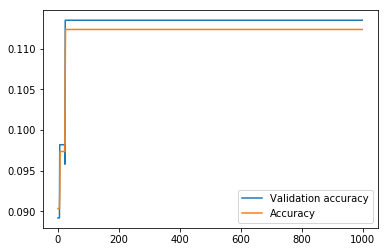

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  8.07it/s]


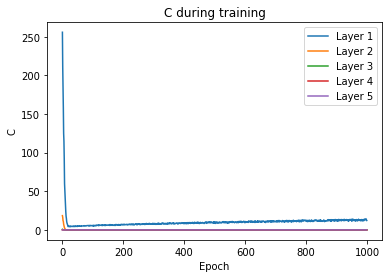

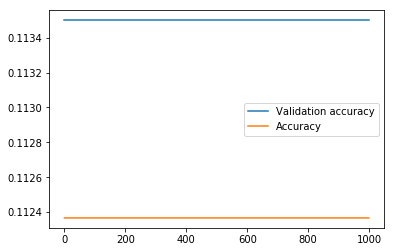

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


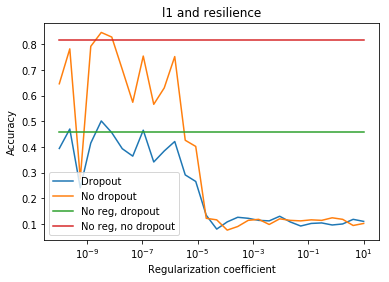

In [9]:
plot_error('l1')

  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.53it/s]


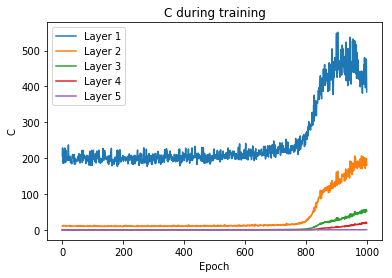

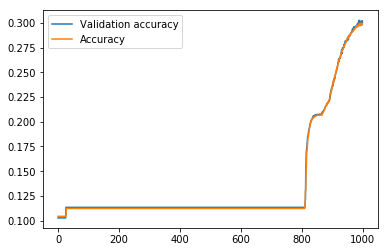

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  8.45it/s]


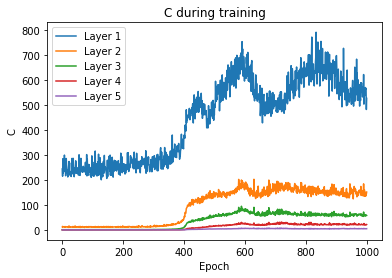

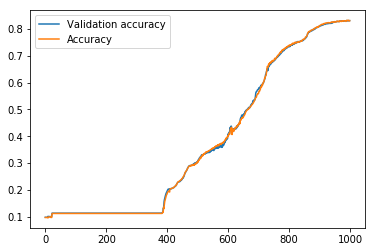

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  8.32it/s]


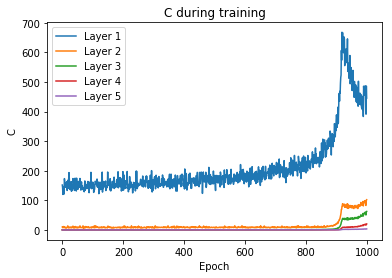

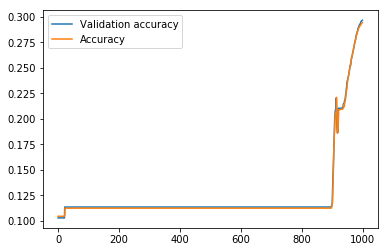

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.42it/s]


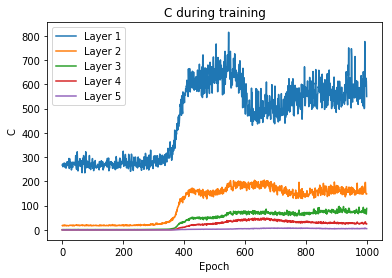

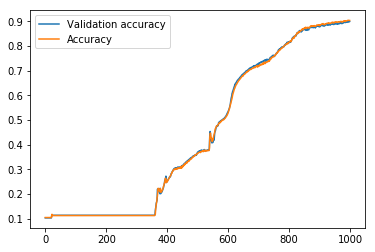

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.40it/s]


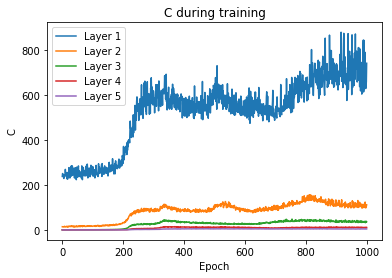

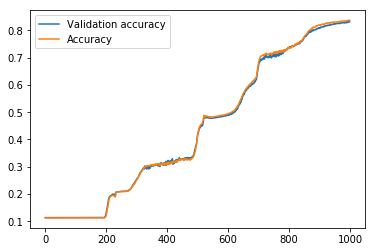

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.66it/s]


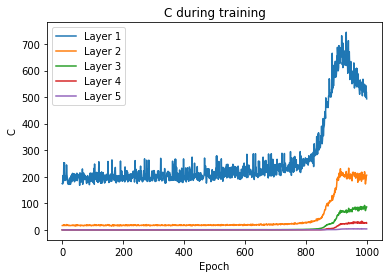

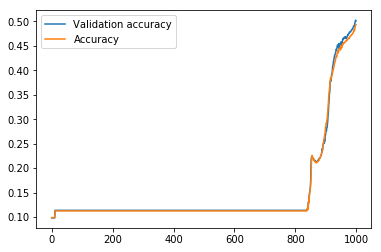

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.61it/s]


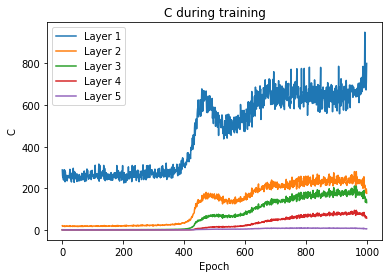

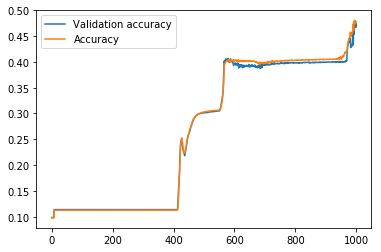

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.41it/s]


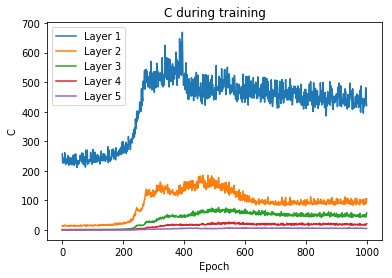

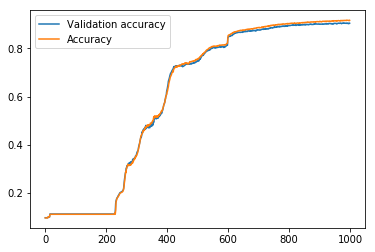

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.62it/s]


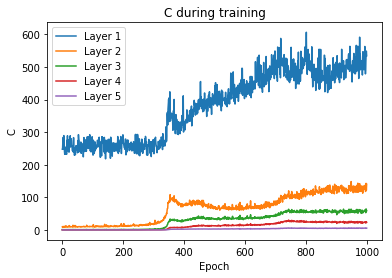

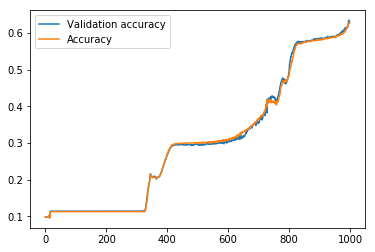

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.53it/s]


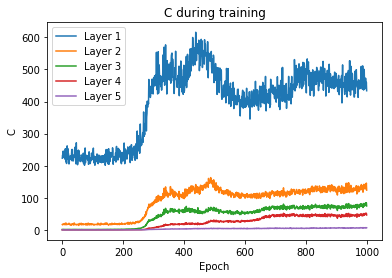

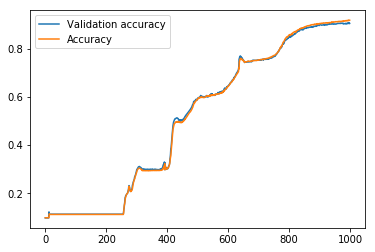

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.43it/s]


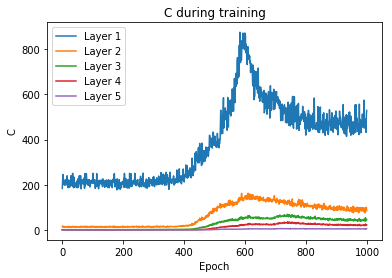

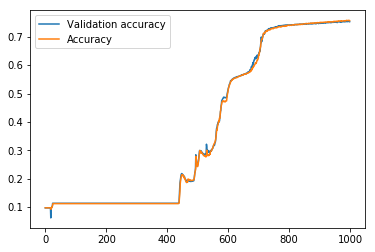

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.43it/s]


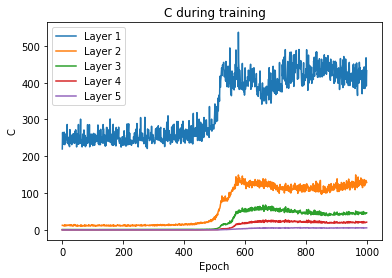

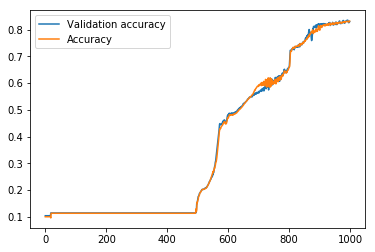

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.48it/s]


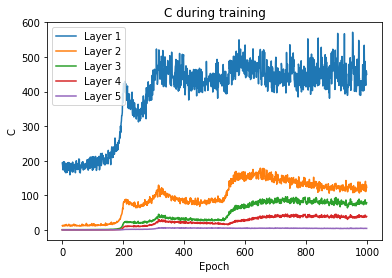

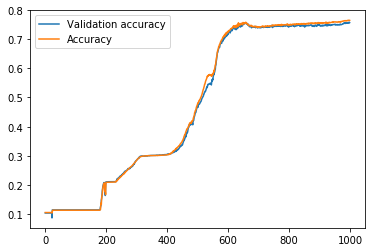

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.42it/s]


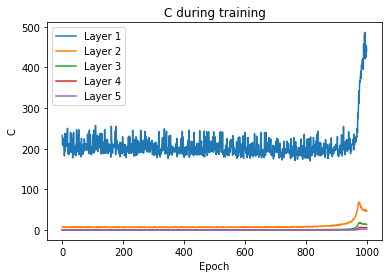

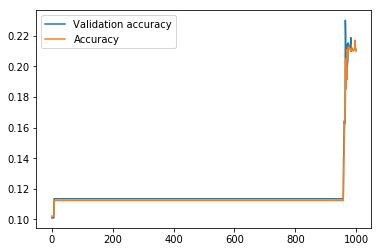

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.42it/s]


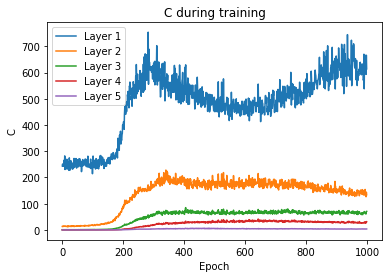

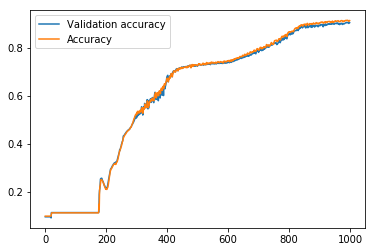

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.39it/s]


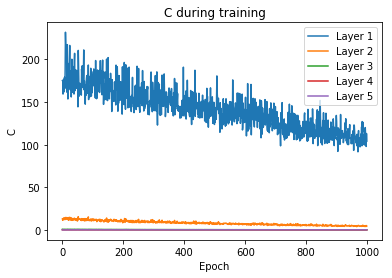

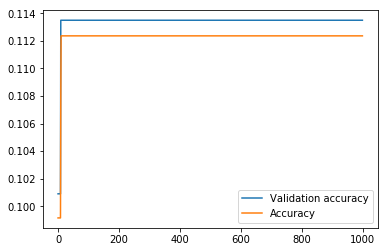

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.50it/s]


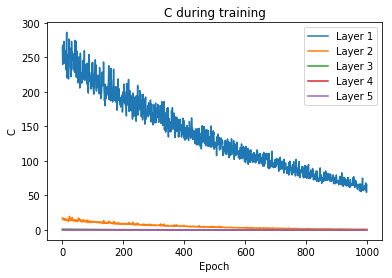

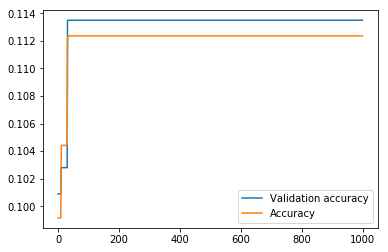

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.52it/s]


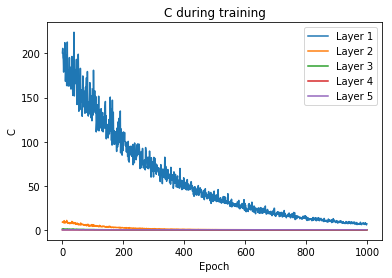

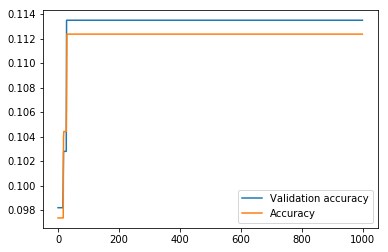

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.68it/s]


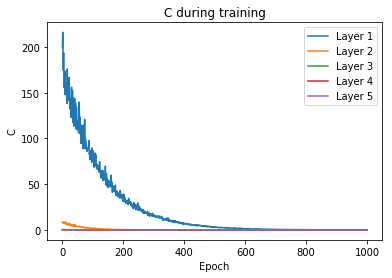

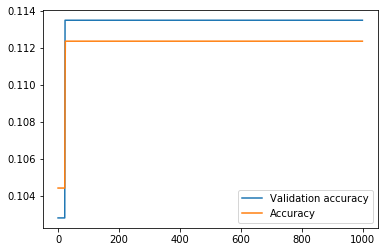

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.50it/s]


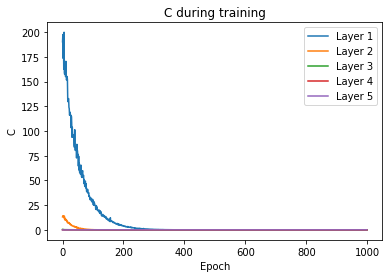

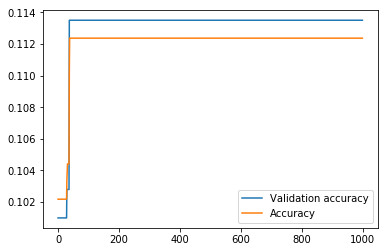

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.45it/s]


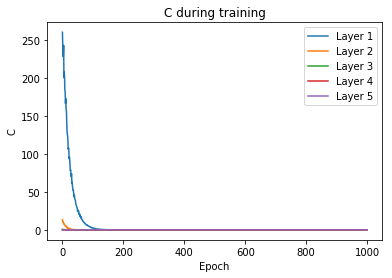

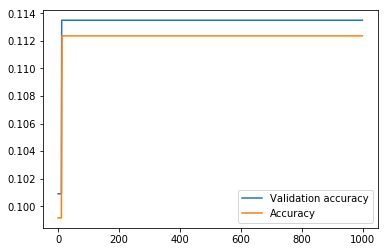

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.49it/s]


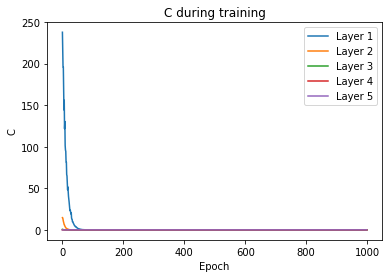

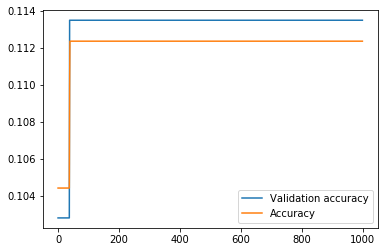

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.55it/s]


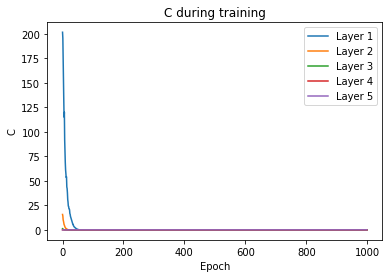

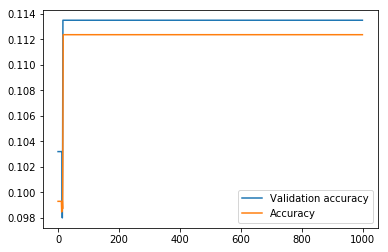

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.65it/s]


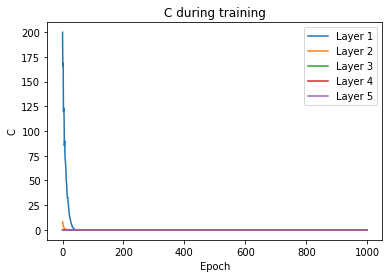

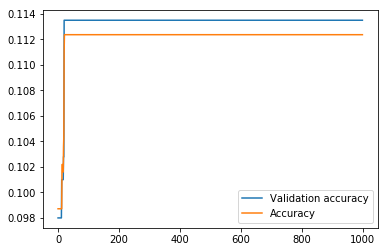

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.76it/s]


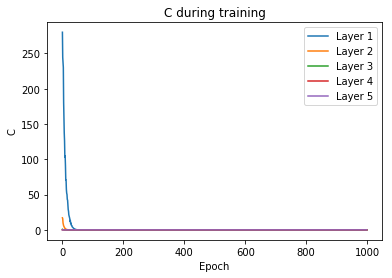

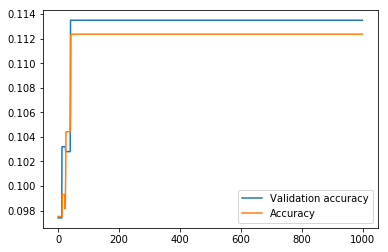

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.43it/s]


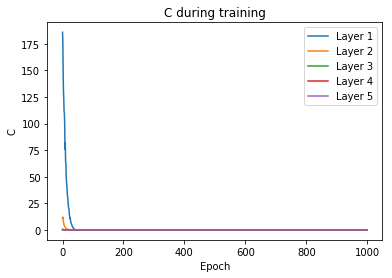

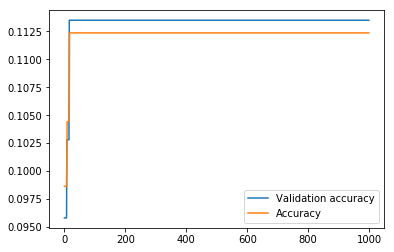

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:46<00:00,  9.53it/s]


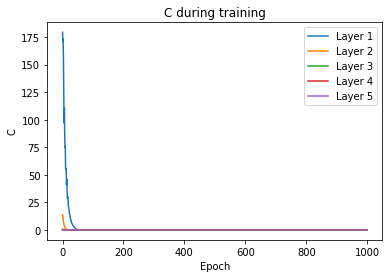

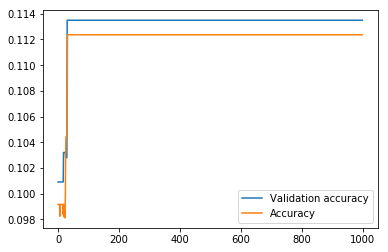

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:45<00:00,  9.52it/s]


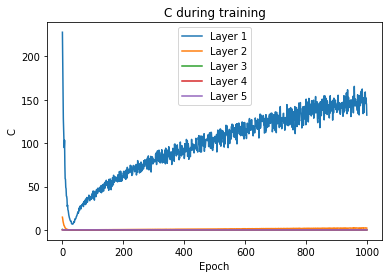

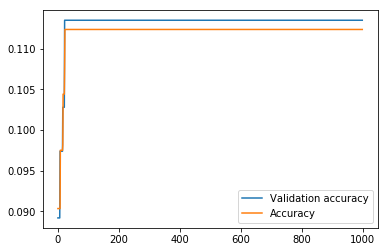

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:44<00:00,  9.68it/s]


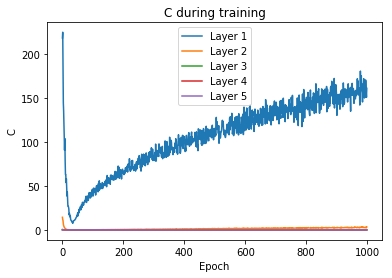

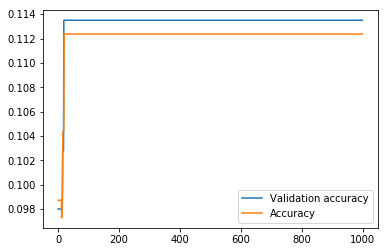

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:44<00:00,  9.64it/s]


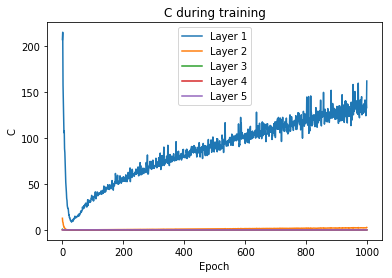

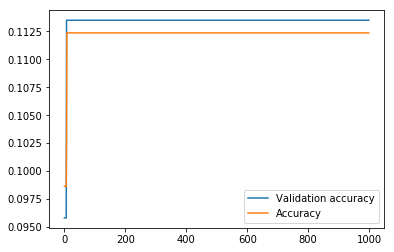

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


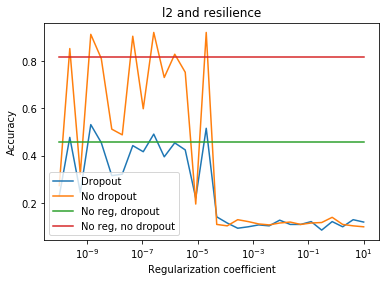

In [10]:
plot_error('l2')

  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:50<00:00,  9.14it/s]


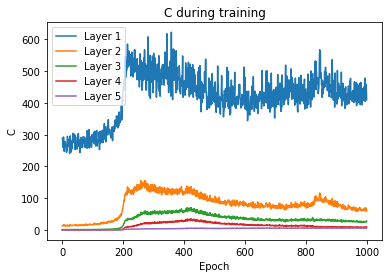

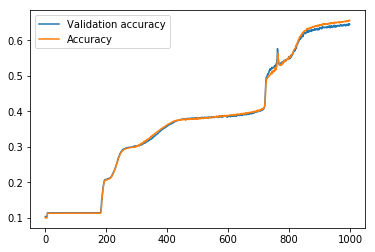

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:49<00:00,  9.23it/s]


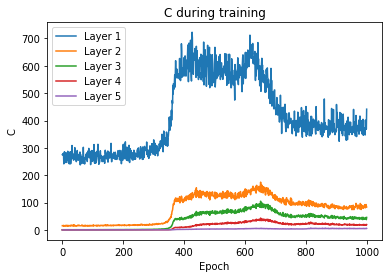

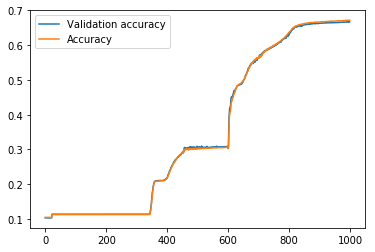

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:49<00:00,  9.15it/s]


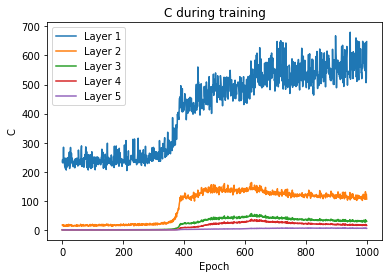

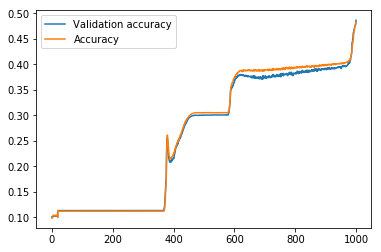

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.16it/s]


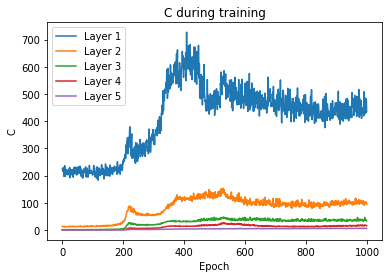

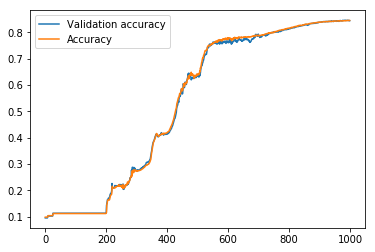

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.24it/s]


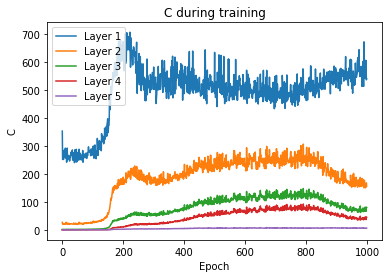

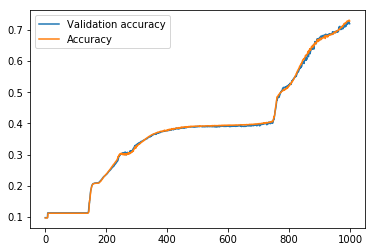

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.25it/s]


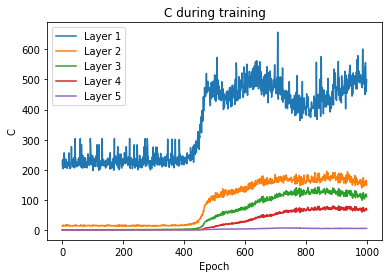

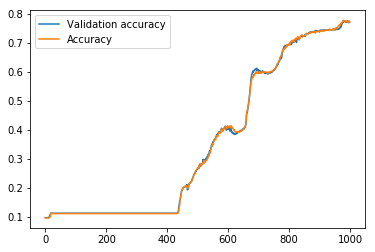

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:49<00:00,  9.26it/s]


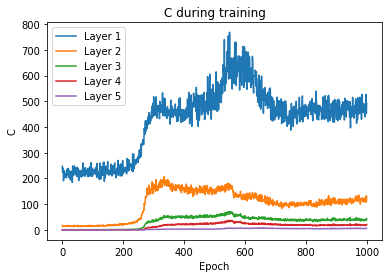

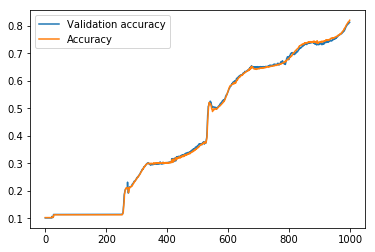

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.31it/s]


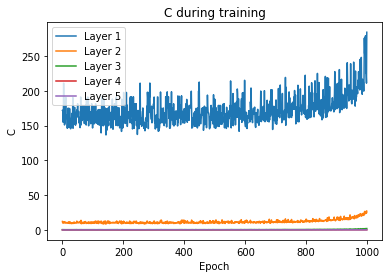

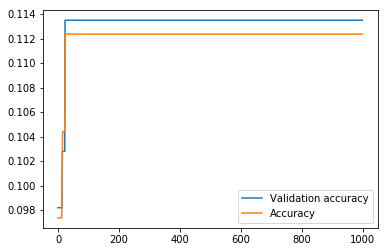

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.28it/s]


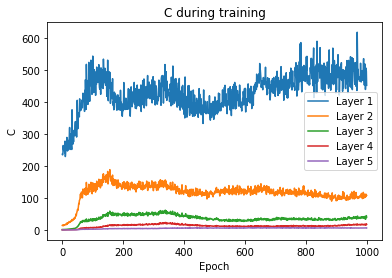

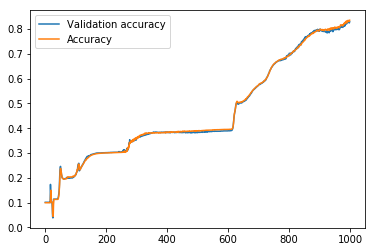

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.22it/s]


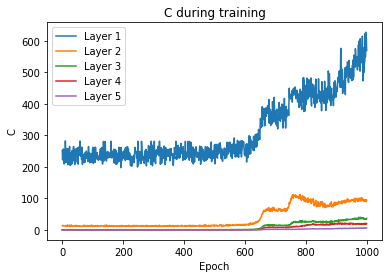

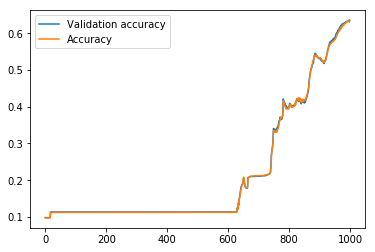

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.46it/s]


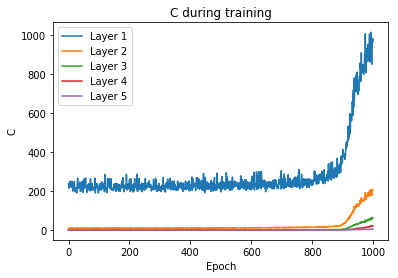

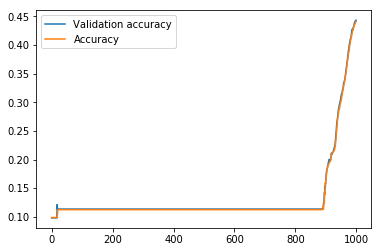

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.36it/s]


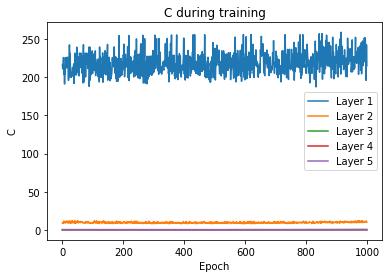

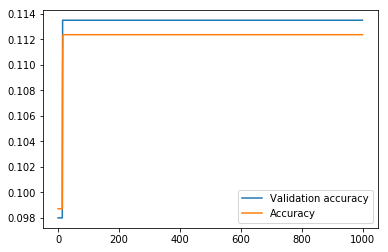

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.21it/s]


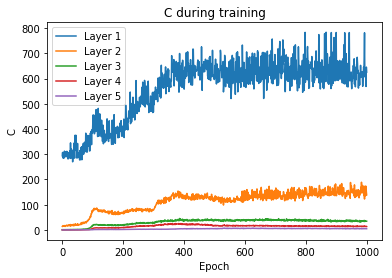

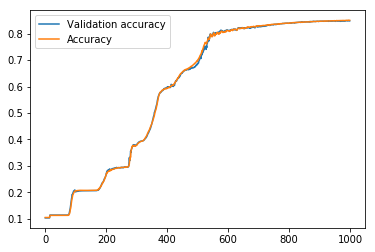

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.02it/s]


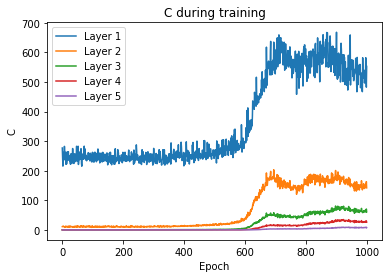

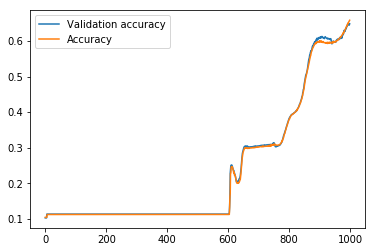

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.22it/s]


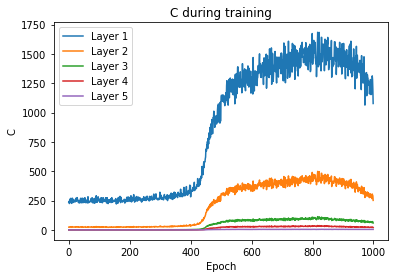

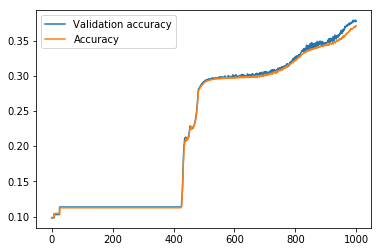

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.36it/s]


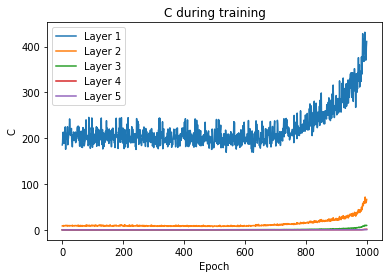

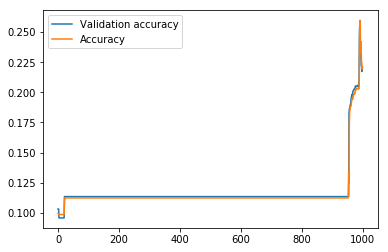

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.30it/s]


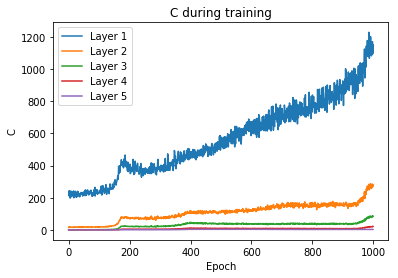

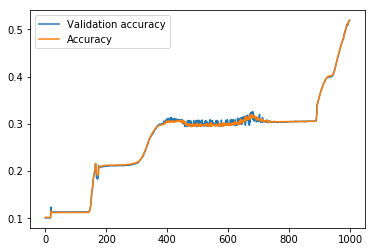

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.27it/s]


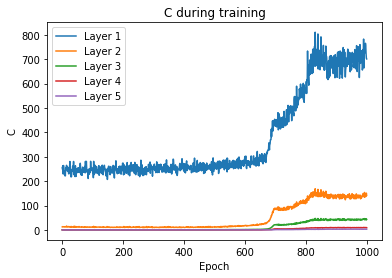

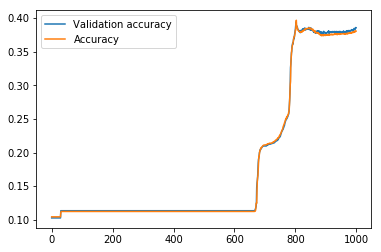

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.14it/s]


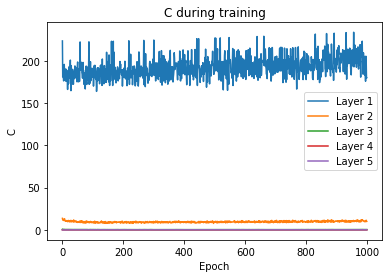

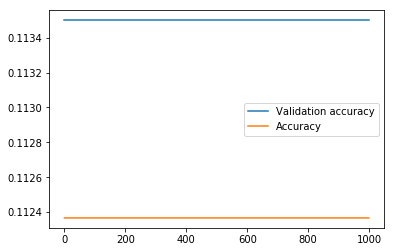

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.32it/s]


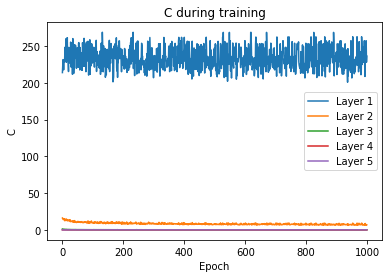

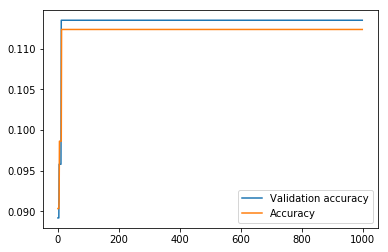

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.32it/s]


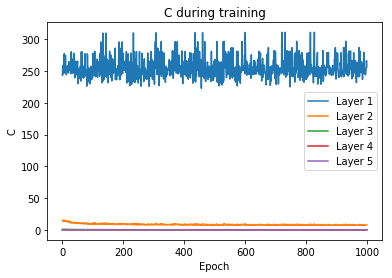

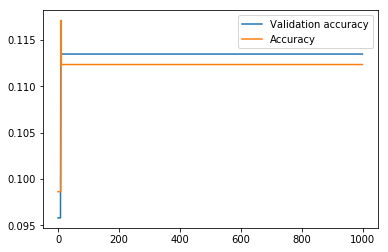

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.28it/s]


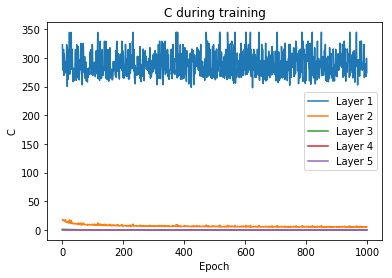

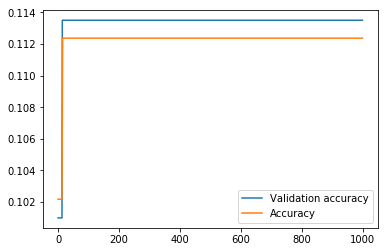

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.36it/s]


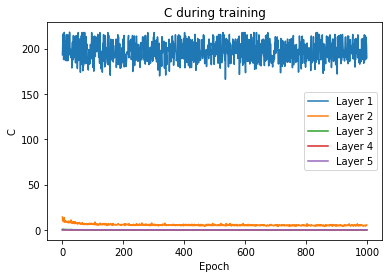

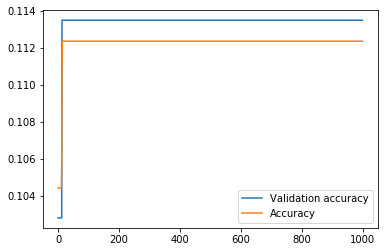

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.38it/s]


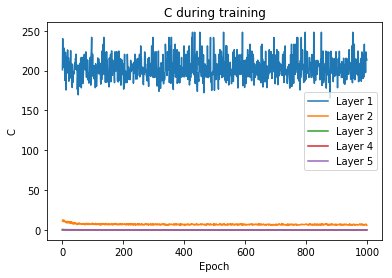

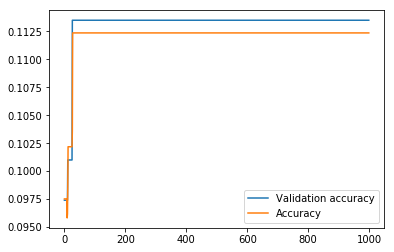

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.51it/s]


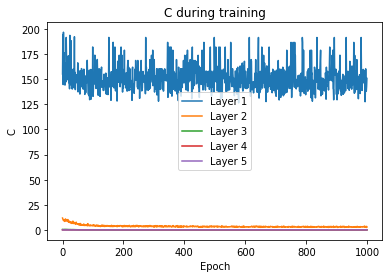

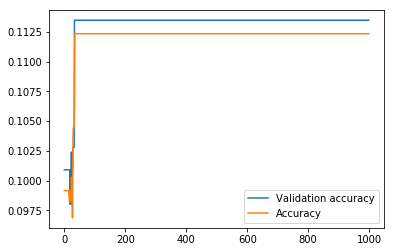

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.23it/s]


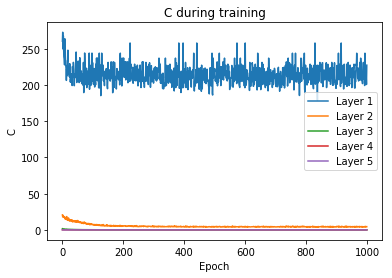

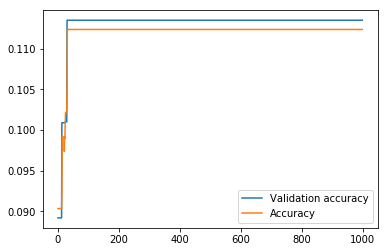

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.26it/s]


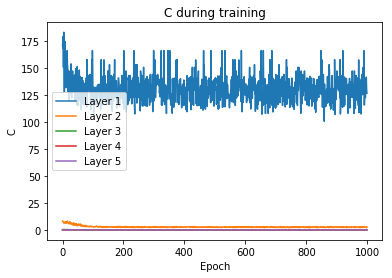

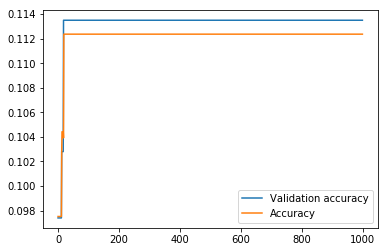

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.21it/s]


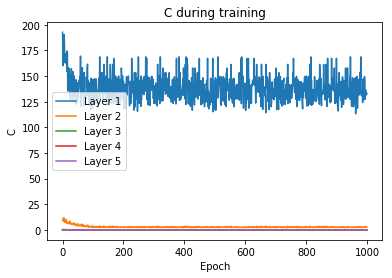

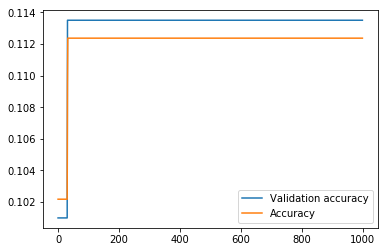

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.25it/s]


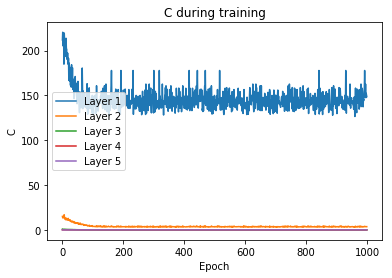

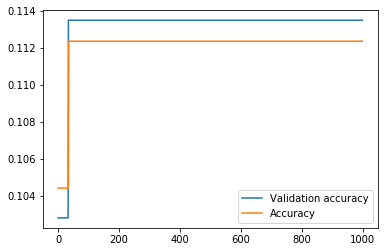

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


  0%|          | 0/1000 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [01:48<00:00,  9.34it/s]


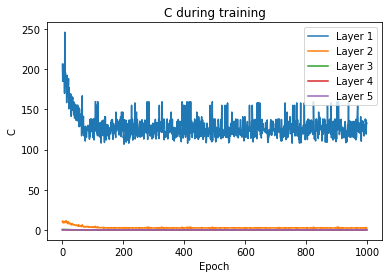

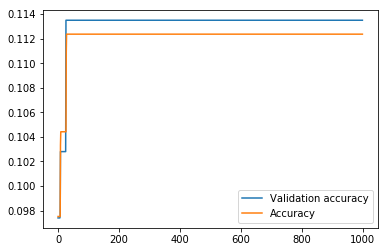

Creating network for 784-dimensional input and 10-dimensional output, with 5 hidden layers


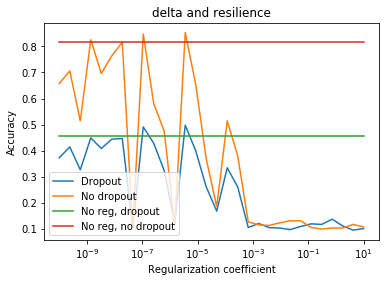

In [11]:
plot_error('delta')